In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
dir(cancer)
X=cancer.data
Y=cancer.target
df=pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
print(df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


In [4]:
import scipy.stats as stats
xscaled=stats.zscore(X,axis=0)
print(xscaled)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [5]:
xtrain,xtest,ytrain,ytest=train_test_split(xscaled,Y,test_size=0.25,random_state=51)
print("xtrain shape",xtrain.shape)
print("xtest shape",xtest.shape)
print("ytrain shape",ytrain.shape)
print("ytest shape",ytest.shape)


xtrain shape (426, 30)
xtest shape (143, 30)
ytrain shape (426,)
ytest shape (143,)


In [6]:
# sns.heatmap(df,annot=True)


In [7]:
from sklearn.neural_network import MLPClassifier
ml=MLPClassifier(hidden_layer_sizes=(70,60),activation="logistic",solver="sgd",max_iter=1500)
cl=ml.fit(xtrain,ytrain)
ypred=ml.predict(xtest)
print(ypred)

[1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0
 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0]


In [8]:
cm=confusion_matrix(ytest,ypred)
df2=pd.DataFrame(data=cm,columns=cancer.target_names)
print(df2)
# print(cancer.feature_names)
# print(cancer.target_names)

   malignant  benign
0         42       7
1          0      94


<Axes: >

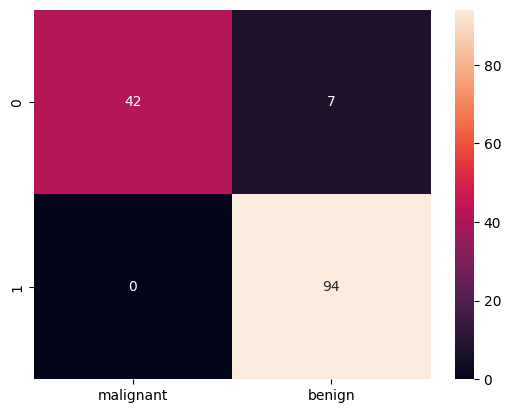

In [9]:
sns.heatmap(df2,annot=True)

In [10]:
print("accuracy_score: ",accuracy_score(ytest,ypred)*100)

accuracy_score:  95.1048951048951


In [11]:
report=classification_report(ytest,ypred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        49
           1       0.93      1.00      0.96        94

    accuracy                           0.95       143
   macro avg       0.97      0.93      0.94       143
weighted avg       0.95      0.95      0.95       143



In [12]:
report=classification_report(ytest,ypred,target_names=cancer.target_names,output_dict=True)
df3=pd.DataFrame(report)
print(df3)

           malignant     benign  accuracy   macro avg  weighted avg
precision   1.000000   0.930693  0.951049    0.965347      0.954442
recall      0.857143   1.000000  0.951049    0.928571      0.951049
f1-score    0.923077   0.964103  0.951049    0.943590      0.950045
support    49.000000  94.000000  0.951049  143.000000    143.000000


<Axes: >

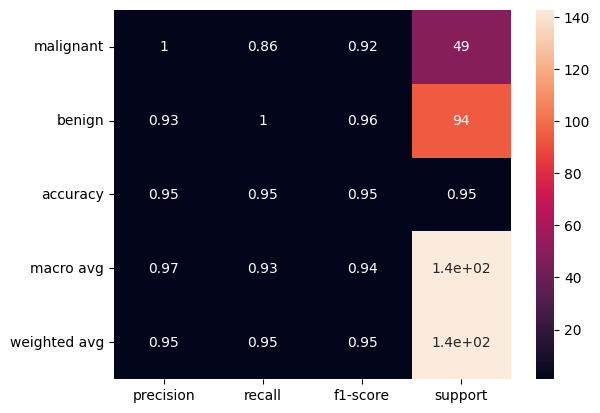

In [13]:
sns.heatmap(df3.T,annot=True)

<Axes: xlabel='precision', ylabel='recall'>

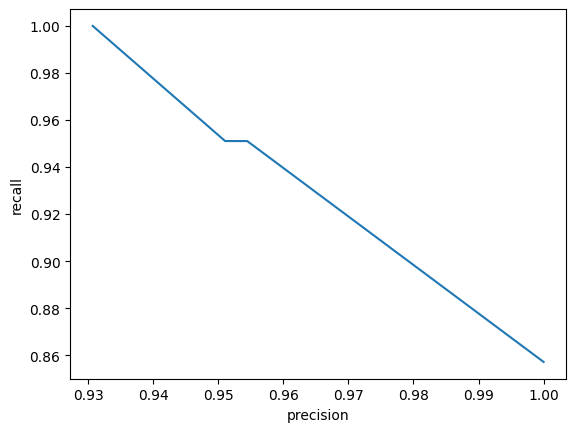

In [14]:
# precision vs recall
sns.lineplot(x=df3.iloc[0],y=df3.iloc[1])

In [36]:
from sklearn.neural_network import MLPRegressor
mlp=MLPRegressor()
c=mlp.fit(xtrain,ytrain)
ypredd=mlp.predict(xtest)
print(ypredd)

[ 9.10737914e-01  1.09562414e+00  7.78673354e-01  1.18848801e+00
  9.38339375e-01  3.12233860e-01  1.06202552e+00  5.35615390e-01
 -4.05493390e-02  1.04972413e-01  6.74807338e-02  9.61120068e-01
  7.85904921e-01  7.20511231e-01  9.83401312e-01  5.44742302e-01
  8.98209373e-01  8.57117266e-01  1.04883947e+00  1.22842559e+00
 -2.00592873e-01  8.55503418e-01  3.41339619e-01  8.99106713e-01
  1.00893496e+00  8.42381499e-01  8.46977074e-01  1.00444348e+00
  1.21755060e+00  9.69933834e-01  3.03317898e-01  1.00971721e+00
  1.09994754e+00  9.62403808e-01  9.62331440e-01  9.40168218e-01
  2.61811153e-01  1.13990903e+00  1.10125735e+00  9.76677325e-01
  6.70688023e-01  8.48465623e-01  8.15150374e-01  2.14992772e-01
  9.69087950e-01 -9.15466405e-04 -1.08495311e-01  3.03982917e-01
  1.02591164e+00  1.02689386e+00  9.86921289e-01  9.22460363e-01
  1.15860401e-01  9.81134934e-01  2.31656332e-01  1.02771459e+00
 -4.36888003e-01  7.47251478e-02  1.01559074e+00  9.20497583e-01
  8.65328364e-01  9.75626

In [45]:
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(ytest,ypredd)*100)
print(np.sqrt(mean_squared_error(ytest,ypredd)))

74.48253736636923
0.23974230310102215
